In [43]:
# Avg(Var(X(t) - X(0))) = 2Dt, where D is the microscopic diffusion coefficient

# we take average over all particles

import mdtraj
import numpy as np

traj = mdtraj.load('production.h5')


/Users/ziyuanzhao/opt/anaconda3/envs/openmm2/lib/python3.9/site-packages/mdtraj/core/trajectory.py:438: UserWarning: top= kwargs ignored since this file parser does not support it
  warnings.warn('top= kwargs ignored since this file parser does not support it')


In [107]:
mu_dx2_arr = []
dt_arr = []
for dt in range(0, 500, 5):
    t0 = 500
    t1 = t0 + dt
    dx = traj.xyz[t1, :, :] - traj.xyz[t0, :, :]
    dx2 = np.einsum('ij,ij->i', dx, dx)
    mu_dx2_arr.append(np.mean(dx2))
    dt_arr.append(dt)


Text(0, 0.5, 'MSD (1e-18 m^2)')

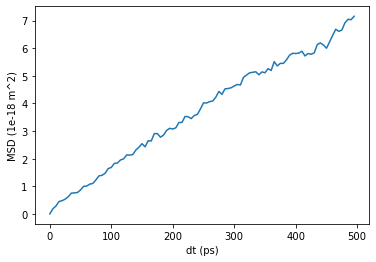

In [109]:
import matplotlib.pyplot as plt

plt.plot(dt_arr[:], mu_dx2_arr[:])
plt.xlabel('dt (ps)')
plt.ylabel('MSD (1e-18 m^2)')

In [118]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(dt_arr, [r*100 for r in mu_dx2_arr])
print(slope, intercept, r_value, p_value, std_err)

1.3701446785069857 33.094391370763844 0.9963905795850271 8.574802998081695e-107 0.011791397191342288


In [32]:
traj.save('movie.pdb')

In [39]:
dx

array([[-1.0622807 ,  1.151521  ,  0.9443276 ],
       [-0.88917124,  1.1812928 ,  1.1462727 ],
       [-0.98108256,  1.0557371 ,  0.7706889 ],
       ...,
       [ 1.5659909 , -0.13706315, -0.8063883 ],
       [ 1.4989709 ,  0.05270922, -0.6922876 ],
       [ 1.4830246 , -0.21553719, -0.46527147]], dtype=float32)

In [40]:
dx2

array([3.3461952, 3.500019 , 2.6710653, ..., 3.1213758, 2.728954 ,
       2.462296 ], dtype=float32)

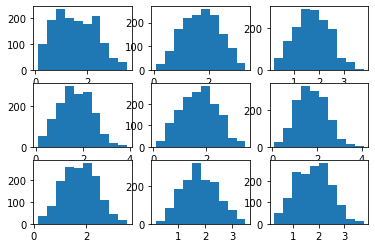

In [84]:
f, ax = plt.subplots(3,3)

for dt in range(9):
    t0 = 500
    t1 = t0 + (dt+1) * 50
    dx = traj.xyz[t1, :, :] - traj.xyz[t0, :, :]
    dx2 = np.einsum('ij,ij->i', dx, dx)
    ax[dt%3, dt//3].hist(dx2**(1/2))

In [93]:
dx=traj.xyz[1:,:,0]-traj.xyz[:-1,:,0]
L=2
eps=L/2
dx_corr=dx-L*(np.sign(dx)*((np.abs(dx)-eps)>0))

for i in range(3)


In [106]:
L=2 # nm
eps=L/2
for i in range(3):
    dxi = traj.xyz[1:,:,i]-traj.xyz[:-1,:,i]
    dx_corr=dx-L*(np.sign(dx)*((np.abs(dx)-eps)>0))
    xi_corr = np.cumsum(np.concatenate((traj.xyz[0:1,:,i], dx_corr)), axis=0)
    traj.xyz[:,:,i] = xi_corr

In [104]:
traj.xyz[0:1,:,i].shape

(1, 1500)

(array([   659.,  10787.,  18928., 114473., 602211., 605973., 116365.,
         18978.,  10953.,    673.]),
 array([-8.8905382e-01, -7.1136594e-01, -5.3367811e-01, -3.5599023e-01,
        -1.7830238e-01, -6.1452389e-04,  1.7707333e-01,  3.5476118e-01,
         5.3244907e-01,  7.1013689e-01,  8.8782477e-01], dtype=float32),
 <BarContainer object of 10 artists>)

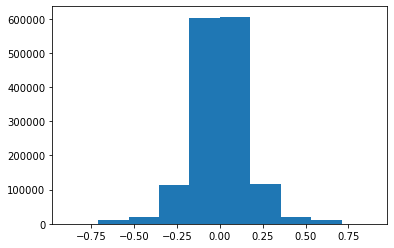

In [95]:
plt.hist(dx_corr.flatten())